# Apply Random Forest

For this exercise, we are going to try out a Random Forest implementation from sklearn (one of my favorite packages). The link to the documentation can be found here:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

We thought that the raisin dataset from UCI would be fun to use. Here is a link to the data set:

http://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

This seems like a good dataset to try out a Random Forest Classifier on because there are two different classes of raisins and and 7 morphological features.

# Loading the data

In [42]:
#run these first two lines for any package that is not yet installed
# import sys
# !{sys.executable} -m pip install openpyxl

import pandas as pd
import openpyxl

In [11]:
raisin_data = pd.read_excel("Raisin_Dataset.xlsx")
raisin_data = pd.DataFrame(raisin_data)

display(raisin_data.head())
print("Nr of samples: " + str(len(raisin_data.index)))

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


Nr of samples: 900


In [36]:
# Setting class to 0: Kecimen, 1 : Besni
raisin_data["Binary Class"] = 0
raisin_data.loc[raisin_data['Class'] == "Besni", "Binary Class"] = 1

display(raisin_data.head())

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,Binary Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen,0


Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class', 'Binary Class'],
      dtype='object')


# Visualization

Before we start making models, we want to learn a bit more about this dataset

In [25]:
# The data set is balanced
print(raisin_data.groupby('Binary Class').size())

Binary Class
0    450
1    450
dtype: int64


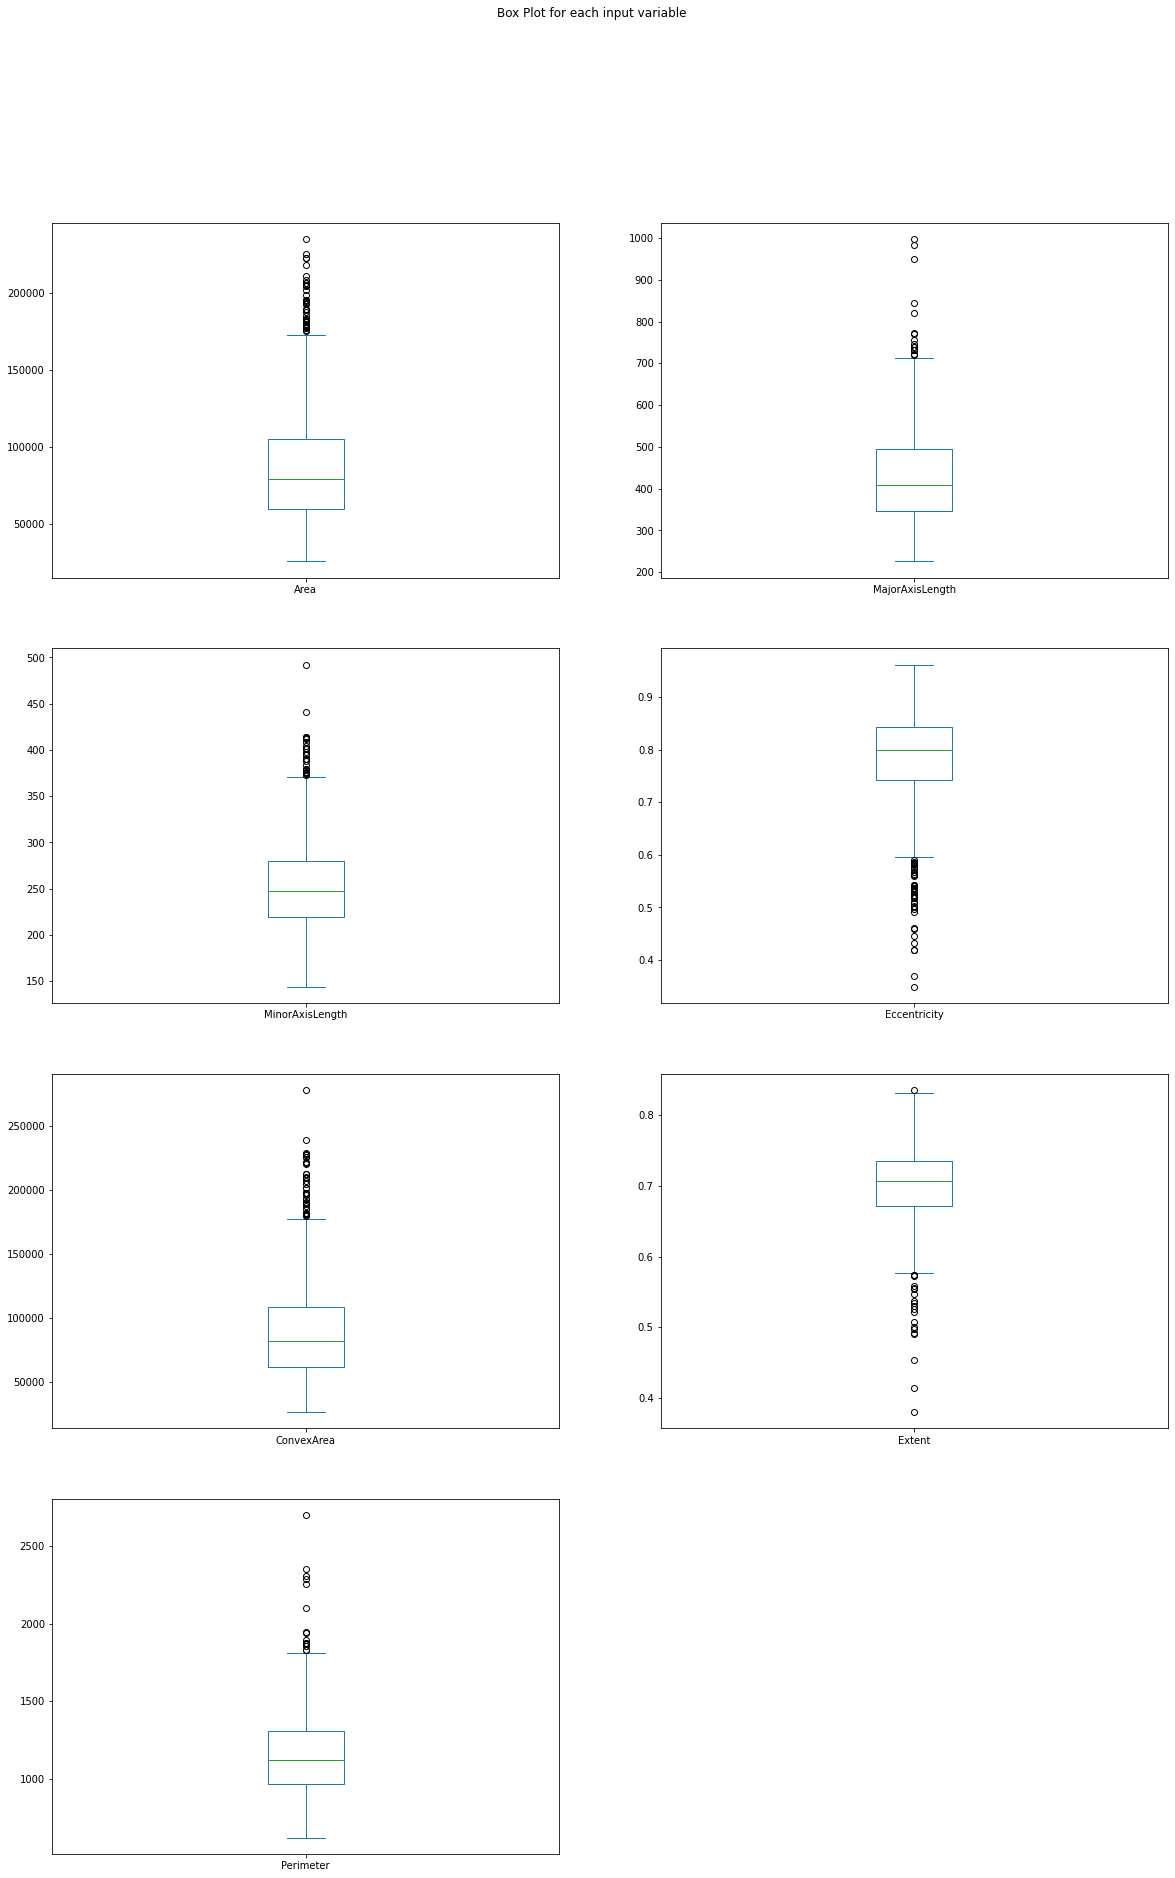

In [32]:
# A box plot for each variable will give us a clearer idea of the distribution of the input variables
raisin_data.drop('Binary Class', axis=1).plot(kind='box', subplots=True, layout=(4,2), sharex=False, sharey=False, figsize=(20,30), 
                                        title='Box Plot for each input variable')
plt.show()

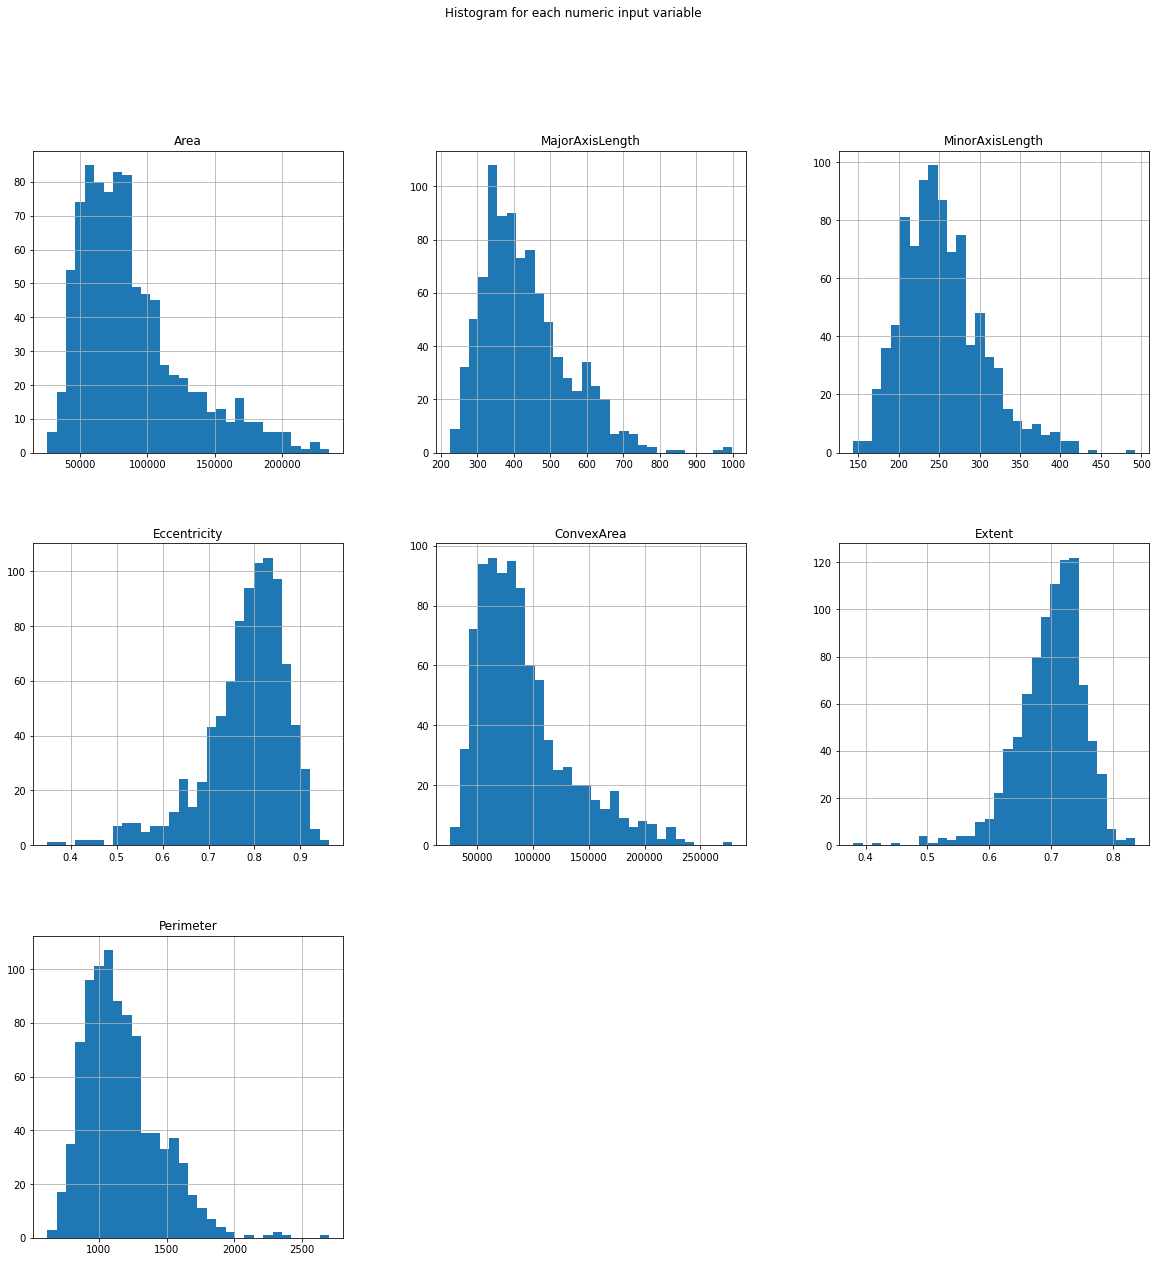

In [35]:
# we also want to learn more about the distribution for each input variables
import pylab as pl
raisin_data.drop('Binary Class' ,axis=1).hist(bins=30, figsize=(20,20))
pl.suptitle("Histogram for each numeric input variable")
plt.show()

Text(0.5, 0.98, 'Scatter-matrix for each input variable')

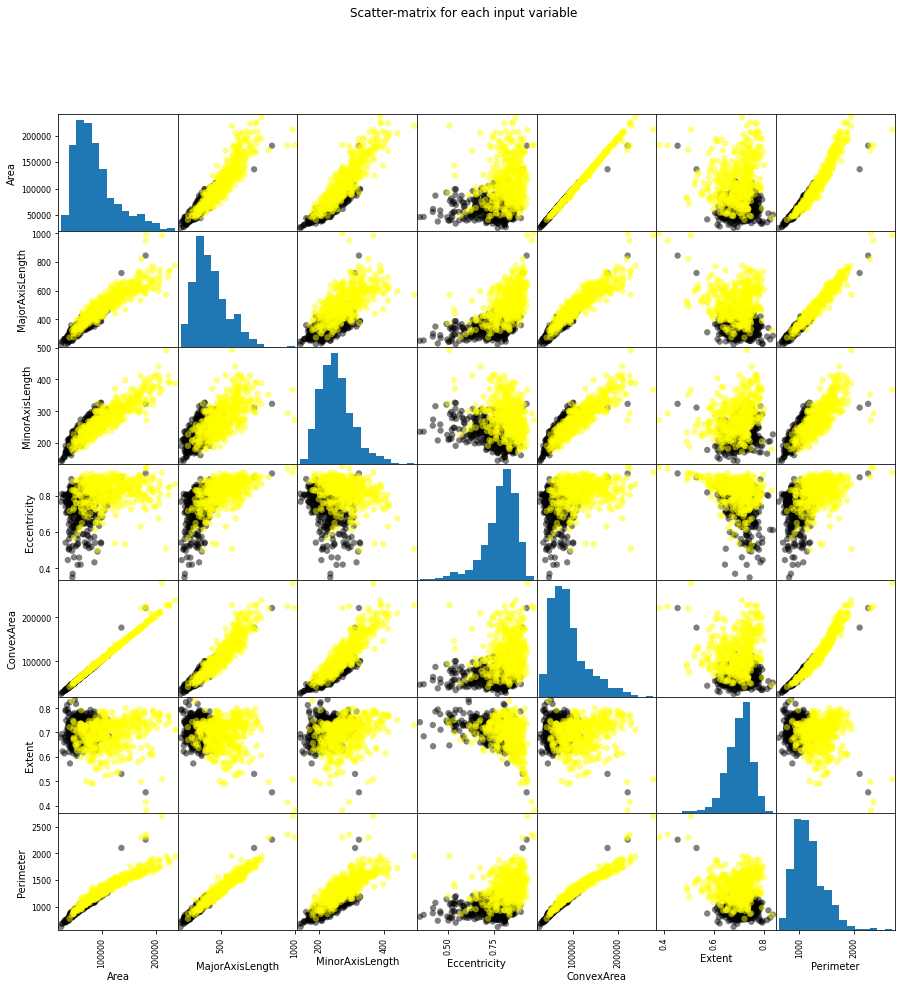

In [51]:
# Check for high correlation between input variables
from pandas.plotting import scatter_matrix
from matplotlib import cm

feature_names = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity','ConvexArea', 'Extent', 'Perimeter']
X = raisin_data[feature_names]
y = raisin_data['Binary Class']
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(15,15), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')

In [52]:
# Area and convex area seem correlated, but for now this doesn't seem like a problem and we will just use both

# Baseline model

One really simple model that we could train as baseline model is a logistic regression model.
We will use one of sklearn's methods to split the data into train and test data

In [53]:
# Some imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [55]:
x = raisin_data[['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter']]
y = raisin_data['Binary Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# we apply scaling as pre-process step
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Sanity checks about length of train and test data
print("Nr of train samples:" + str(len(x_train)))
print("Nr of test samples:" + str(len(x_test)))

Nr of train samples:675
Nr of test samples:225


In [56]:
# Making the model
# All parameters not specified are set to their defaults
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred_test = lr.predict(x_test)

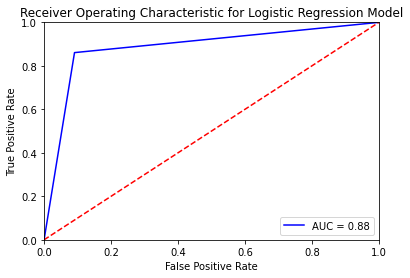

In [57]:
# Model evaluation with ROC curves
fpr, tpr, threshold = metrics.roc_curve(list(y_test), list(y_pred_test))
roc_auc = metrics.auc(fpr, tpr)

# Plotting the ROC
plt.title('Receiver Operating Characteristic for Logistic Regression Model')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [58]:
# Use score method to get accuracy of model
score = lr.score(x_test, y_test)
print(score)

0.8844444444444445


In [59]:
print(lr.score(x_train, y_train))

0.8607407407407407


# Ensemble learning: Random Forest

The baseline model has an accuracy score of 88.4%. This is an okay score but there is room for improvement. Let's see if we can do better with ensemble learning.

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
# Making the model
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(x_train, y_train)
 
y_pred_test = clf.predict(x_test)

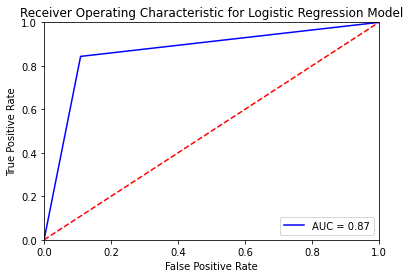

In [62]:
# Model evaluation with ROC curves
fpr, tpr, threshold = metrics.roc_curve(list(y_test), list(y_pred_test))
roc_auc = metrics.auc(fpr, tpr)

# Plotting the ROC
plt.title('Receiver Operating Characteristic for Logistic Regression Model')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [63]:
# Use score method to get accuracy of model
score = clf.score(x_test, y_test)
print(score)

0.8666666666666667


In [64]:
score = clf.score(x_train, y_train)
print(score)

1.0


# Is a better model possible?

To test this quickly, we use grid search.

In [86]:
from sklearn.model_selection import RandomizedSearchCV
model = RandomForestClassifier()
param_vals = {'max_depth': [50, 100, 200, 500, 800, 1000, 1200, 1500], 'n_estimators': [25, 50, 100, 200, 300, 400, 500]}
random_rf = RandomizedSearchCV(estimator=model, param_distributions=param_vals,
                              n_iter=40, scoring='accuracy', cv=5,
                              refit=True, n_jobs=-1)

#Training and prediction

random_rf.fit(x_train, y_train)
preds = random_rf.best_estimator_.predict(x_test)

In [87]:
print(random_rf.best_estimator_.score(x_test, y_test))

0.8666666666666667


In [91]:
import tpot
from tpot import TPOTClassifier
tpot_clf = TPOTClassifier(generations=50, population_size=50, 
                          verbosity=2, offspring_size=50, scoring='accuracy', cv=6)
#Training and prediction

tpot_clf.fit(x_train, y_train)
tpot_pred = tpot_clf.score(x_test, y_test)

                                                                                                                       
Generation 1 - Current best internal CV score: 0.8652286135693216
                                                                                                                       
Generation 2 - Current best internal CV score: 0.871101980615255
                                                                                                                       
Generation 3 - Current best internal CV score: 0.871101980615255
                                                                                                                       
Generation 4 - Current best internal CV score: 0.871101980615255
                                                                                                                       
Generation 5 - Current best internal CV score: 0.871101980615255
                                                                          

                                                                                                                       
Generation 45 - Current best internal CV score: 0.8844553308048884
                                                                                                                       
Generation 46 - Current best internal CV score: 0.8844553308048884
                                                                                                                       
Generation 47 - Current best internal CV score: 0.8844553308048884
                                                                                                                       
Generation 48 - Current best internal CV score: 0.8844553308048884
                                                                                                                       
Generation 49 - Current best internal CV score: 0.8844553308048884
                                                                 

# Conclusion raisin data set

Because after 50 generations the ensemble learner with optimized hyperparameters is only (very) slightly better than logistic regression, we conclude that maybe there isn't that much to gain by using an ensemble classifier on this data set. We will continue with a different data set in a different Jupyter Notebook.